In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from skimage import io 
import cv2
import numpy as np
import os
from PIL import Image
import tensorflow as tf                
from tqdm import tqdm
import os
from sklearn.metrics import confusion_matrix
# import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt 
import random
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf 

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
class_names = ['angry', 'disgust', 'fear','happy','neutral','sad','surprise']
clas=class_names
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

# Augmentation

In [2]:


dataset_atrain=[]
image_directory='/kaggle/input/dataset/fer2013/train/disgust'

my_images=os.listdir(image_directory)
for i,image_name in enumerate(my_images):
  if(image_name.split('.')[1]=='jpg' or image_name.split('.')[1]=='png'):
    image=io.imread(image_directory + image_name)
    image = np.expand_dims(image, axis=-1)  
    image = image.astype(np.float32)
    #image=Image.fromarray(image)
    dataset_atrain.append(np.array(image))

x=np.array(dataset_atrain)

i=0
for batch in datagen.flow(x,batch_size=3,
                          save_to_dir='/kaggle/input/dataset/fer2013/train/disgust',
                          save_prefix='aug',
                          save_format='jpg'):
  i+=1
  if i>=831:
    break

In [ ]:
datagen=ImageDataGenerator(
    rotation_range=45,      # Random rotation between 0 and 45
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.6, 0.8],
    fill_mode='reflect'   
)

In [3]:
def load_data():
   
    
    datasets = ['/kaggle/input/dataset/fer2013/train', '/kaggle/input/dataset/fer2013/test']
    output = []
    
    
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                
                image = cv2.imread(img_path)
    
#                 image=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)    # Converting into grey scale
                #image.color_mode="grayscale"


                #5x5 Gaussian kernel 
                image = cv2.GaussianBlur(image, (3, 3), 2)

                #  Laplacian filter
                laplacian_kernel = np.array([[0, 0, 1, 0, 0],
                                             [0, 1, 2, 1, 0],
                                             [1, 2, -16, 2, 1],
                                             [0, 1, 2, 1, 0],
                                             [0, 0, 1, 0, 0]], dtype=np.float32)
                image = cv2.filter2D(image, -1, laplacian_kernel)

                
                image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

                
                
                
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype='uint8')
        # images =np.triu((1, 48, 48), k=1).astype("uint8")
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /kaggle/input/dataset/fer2013/train


100%|██████████| 7215/7215 [00:43<00:00, 165.78it/s]


Loading /kaggle/input/dataset/fer2013/test


100%|██████████| 1774/1774 [00:10<00:00, 169.60it/s]


In [5]:
train_image, val_images, train_label, val_labels = train_test_split(train_images, train_labels, test_size=0.3)

In [6]:
val_images.shape

(10039, 48, 48, 3)

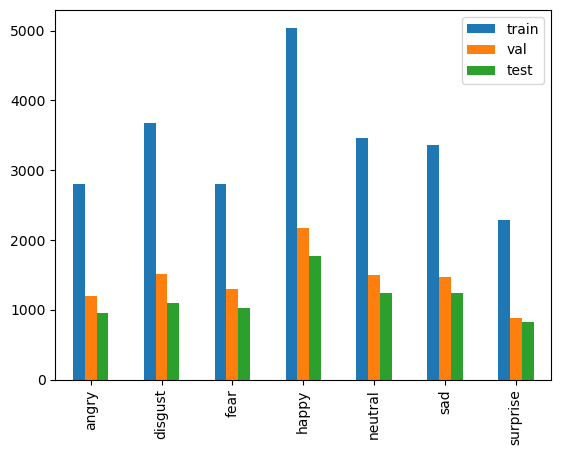

In [7]:
import pandas as pd

_, train_counts = np.unique(train_label, return_counts=True)
_, val_counts = np.unique(val_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,'val':val_counts,
                    'test': test_counts}, 
             index=clas
            ).plot.bar()
plt.show()

In [8]:
test_images.shape

(8168, 48, 48, 3)

In [6]:
def display_random_image(class_names, images, labels):

    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index].astype('uint8'), cmap=plt.cm.binary) # important
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

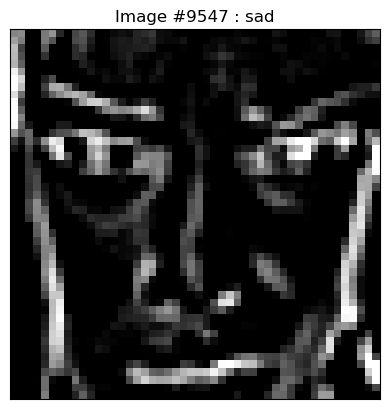

In [13]:
display_random_image(class_names, train_image, train_label)

In [9]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(17,17))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

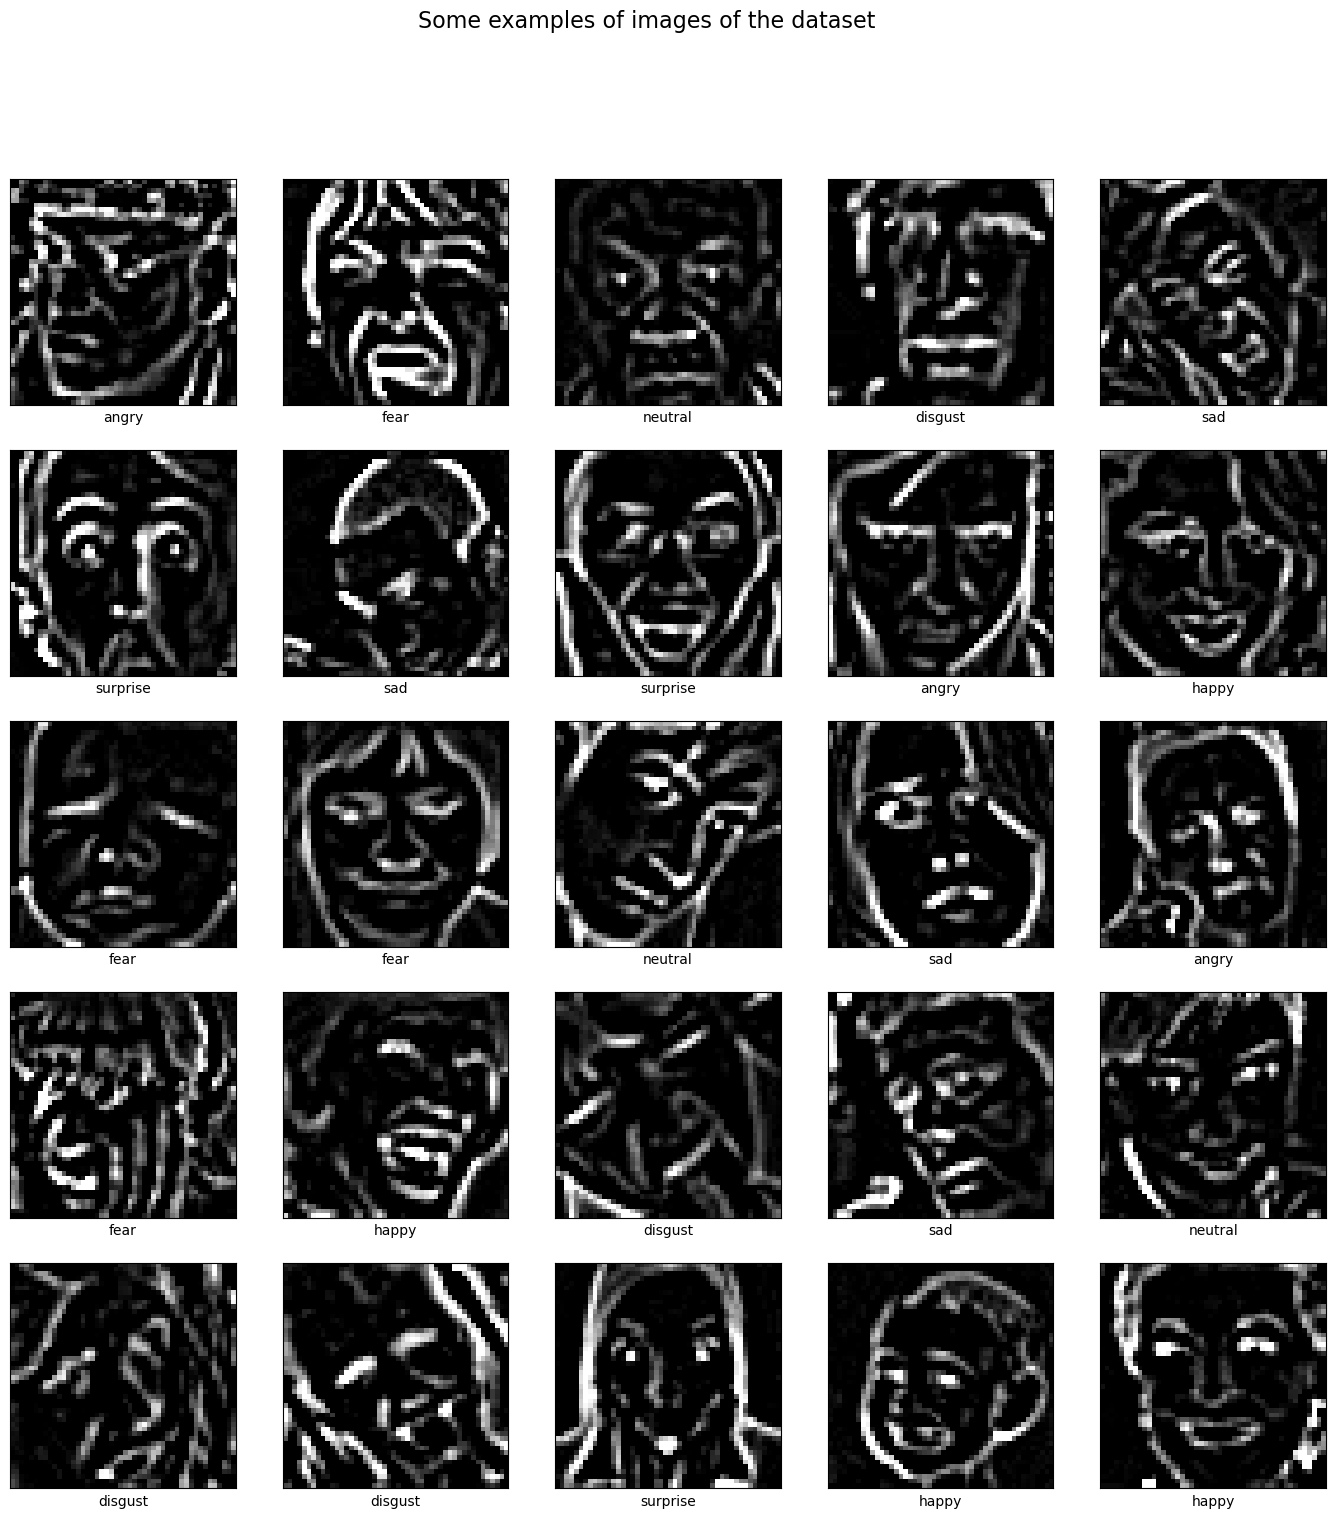

In [14]:
display_examples(class_names, train_image, train_label)

In [56]:
cnn = Sequential()


cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,3)))

cnn.add(BatchNormalization())

cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

cnn.add(BatchNormalization())

cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Dropout(0.25))


cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

cnn.add(BatchNormalization())

cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

cnn.add(BatchNormalization())

cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Dropout(0.25))


cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))

cnn.add(BatchNormalization())

cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))

cnn.add(BatchNormalization())

cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Dropout(0.25))


cnn.add(Flatten())

cnn.add(Dense(256, activation='relu'))

cnn.add(BatchNormalization())

cnn.add(Dropout(0.5))

cnn.add(Dense(7, activation='softmax'))

cnn.compile(loss="sparse_categorical_crossentropy", optimizer= 'adam', metrics=['accuracy'])

In [57]:
history = cnn.fit(
   train_image, train_label,
    epochs=30,
    validation_data=(val_images, val_labels)
)

Epoch 1/30


2023-06-22 19:33:54.825724: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


732/732 [==============================] - 25s 15ms/step - loss: 1.9903 - accuracy: 0.3165 - val_loss: 1.4609 - val_accuracy: 0.4574
Epoch 2/30
732/732 [==============================] - 10s 14ms/step - loss: 1.4650 - accuracy: 0.4539 - val_loss: 1.3600 - val_accuracy: 0.5011
Epoch 3/30
732/732 [==============================] - 10s 14ms/step - loss: 1.3316 - accuracy: 0.5049 - val_loss: 1.3107 - val_accuracy: 0.5112
Epoch 4/30
732/732 [==============================] - 10s 14ms/step - loss: 1.2530 - accuracy: 0.5332 - val_loss: 1.3312 - val_accuracy: 0.5143
Epoch 5/30
732/732 [==============================] - 10s 14ms/step - loss: 1.1856 - accuracy: 0.5616 - val_loss: 1.2096 - val_accuracy: 0.5543
Epoch 6/30
732/732 [==============================] - 10s 14ms/step - loss: 1.1217 - accuracy: 0.5849 - val_loss: 1.1455 - val_accuracy: 0.5793
Epoch 7/30
732/732 [==============================] - 10s 14ms/step - loss: 1.0606 - accuracy: 0.6059 - val_loss: 1.1700 - val_accuracy: 0.5836
Epo

In [61]:
lcnn.save('/kaggle/working/'+'cnn1'+'.h5')

In [62]:
from sklearn.metrics import classification_report

In [63]:
p1=cnn.predict(test_images)
t_p1=np.argmax(p1,axis=1)
classification_report(test_labels,t_p1)
classification_report_string = classification_report(test_labels, t_p1)
print(classification_report_string)

256/256 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.47      0.48      0.48       958
           1       0.82      0.76      0.79      1101
           2       0.42      0.37      0.39      1024
           3       0.74      0.79      0.77      1774
           4       0.48      0.58      0.52      1233
           5       0.42      0.38      0.40      1247
           6       0.76      0.70      0.73       831

    accuracy                           0.59      8168
   macro avg       0.59      0.58      0.58      8168
weighted avg       0.59      0.59      0.59      8168



# **VGG**

In [10]:
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation, GlobalAveragePooling2D

In [11]:
from keras.models import load_model
vgg_base= load_model('/kaggle/input/vgg-model/vgg16_kaggle_weights.h5')

In [12]:
for layer in vgg_base.layers[:11]:
    layer.trainable=False

In [13]:
vgg1=Sequential()
vgg1.add(vgg_base)
vgg1.add(BatchNormalization())
vgg1.add(GaussianNoise(0.01))
vgg1.add(GlobalAveragePooling2D())

vgg1.add(Flatten())
vgg1.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.001),bias_regularizer=regularizers.l2(0.001)))
vgg1.add(BatchNormalization())
vgg1.add(Dropout(0.5))

vgg1.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001),bias_regularizer=regularizers.l2(0.001)))
vgg1.add(BatchNormalization())
vgg1.add(Dropout(0.5))

vgg1.add(Dense(7, activation="softmax"))

# vgg1.summary()

vgg1.compile(loss="sparse_categorical_crossentropy", optimizer= 'adam', metrics=['accuracy'])

In [14]:
history = vgg1.fit(
   train_image, train_label,
    epochs=40,
    validation_data=(val_images, val_labels)
)

Epoch 1/40
732/732 [==============================] - 28s 22ms/step - loss: 2.4815 - accuracy: 0.2415 - val_loss: 2.2526 - val_accuracy: 0.2758
Epoch 2/40
732/732 [==============================] - 15s 21ms/step - loss: 1.7907 - accuracy: 0.4103 - val_loss: 3.1093 - val_accuracy: 0.4334
Epoch 3/40
732/732 [==============================] - 16s 21ms/step - loss: 1.5396 - accuracy: 0.4791 - val_loss: 1.8761 - val_accuracy: 0.3051
Epoch 4/40
732/732 [==============================] - 15s 21ms/step - loss: 1.3995 - accuracy: 0.5171 - val_loss: 1.3322 - val_accuracy: 0.5220
Epoch 5/40
732/732 [==============================] - 16s 21ms/step - loss: 1.3025 - accuracy: 0.5371 - val_loss: 1.3371 - val_accuracy: 0.5219
Epoch 6/40
732/732 [==============================] - 15s 21ms/step - loss: 1.2333 - accuracy: 0.5545 - val_loss: 1.3105 - val_accuracy: 0.5208
Epoch 7/40
732/732 [==============================] - 15s 21ms/step - loss: 1.1584 - accuracy: 0.5801 - val_loss: 1.2377 - val_accuracy:

In [301]:
vgg1.evaluate(val_images, val_labels)

314/314 [==============================] - 3s 9ms/step - loss: 0.6858 - accuracy: 0.8748


[0.6857982277870178, 0.8747883439064026]

In [17]:
vgg1.save('/kaggle/working/'+'vgg1'+'.h5')

# **Resnet 34**

In [18]:
import tensorflow as tf
from tensorflow.keras import layers

def resnet_block(inputs, filters, kernel_size=3, strides=1, activation='relu'):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    
    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    shortcut = inputs
    if strides > 1:
        shortcut = layers.Conv2D(filters, 1, strides=strides, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)
    
    x = layers.Add()([x, shortcut])
    x = layers.Activation(activation)(x)
    return x

def build_resnet34():
    inputs = layers.Input(shape=(48, 48, 3))
    
    x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    
    x = resnet_block(x, 64)
    x = resnet_block(x, 64)
    x = resnet_block(x, 64)
    
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 128)
    x = resnet_block(x, 128)
    x = resnet_block(x, 128)
    
    x = resnet_block(x, 256, strides=2)
    x = resnet_block(x, 256)
    x = resnet_block(x, 256)
    x = resnet_block(x, 256)
    x = resnet_block(x, 256)
    x = resnet_block(x, 256)
    
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs, outputs)
    return model


num_classes = 7

resnet2 = build_resnet34()
# resnet2.summary()


In [19]:
resnet2.compile(loss="sparse_categorical_crossentropy", optimizer= 'adam', metrics=['accuracy'])

history = resnet2.fit(
   train_image, train_label,
    epochs=40,
    validation_data=(val_images, val_labels)
)

Epoch 1/40
732/732 [==============================] - 40s 27ms/step - loss: 1.8895 - accuracy: 0.3564 - val_loss: 1.5477 - val_accuracy: 0.4513
Epoch 2/40
732/732 [==============================] - 18s 25ms/step - loss: 1.3762 - accuracy: 0.4917 - val_loss: 1.5001 - val_accuracy: 0.4387
Epoch 3/40
732/732 [==============================] - 18s 24ms/step - loss: 1.2409 - accuracy: 0.5412 - val_loss: 1.4338 - val_accuracy: 0.4755
Epoch 4/40
732/732 [==============================] - 18s 24ms/step - loss: 1.1531 - accuracy: 0.5755 - val_loss: 1.3161 - val_accuracy: 0.5351
Epoch 5/40
732/732 [==============================] - 18s 24ms/step - loss: 1.0701 - accuracy: 0.6072 - val_loss: 1.2642 - val_accuracy: 0.5341
Epoch 6/40
732/732 [==============================] - 18s 25ms/step - loss: 0.9888 - accuracy: 0.6362 - val_loss: 1.4638 - val_accuracy: 0.5415
Epoch 7/40
732/732 [==============================] - 19s 25ms/step - loss: 0.9032 - accuracy: 0.6701 - val_loss: 1.2031 - val_accuracy:

In [20]:
resnet2.evaluate(val_images, val_labels)

314/314 [==============================] - 2s 7ms/step - loss: 2.5545 - accuracy: 0.5847


[2.554517984390259, 0.5847195982933044]

In [24]:
resnet2.save('/kaggle/working/'+'res1'+'.h5')

# **CNN1-2**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization

cnn1_2 = Sequential()

cnn1_2.add(Conv2D(64, (3, 3), input_shape=(48, 48, 3)))
cnn1_2.add(Activation('relu'))
cnn1_2.add(BatchNormalization())

cnn1_2.add(MaxPooling2D(pool_size=(2, 2)))

cnn1_2.add(Conv2D(128, (3, 3)))
cnn1_2.add(Dropout(0.2))
cnn1_2.add(Activation('relu'))
cnn1_2.add(BatchNormalization())

cnn1_2.add(MaxPooling2D(pool_size=(2, 2)))

cnn1_2.add(Conv2D(256, (3, 3)))
cnn1_2.add(Activation('relu'))
cnn1_2.add(BatchNormalization())

cnn1_2.add(MaxPooling2D(pool_size=(2, 2)))

cnn1_2.add(Conv2D(256, (3, 3)))
cnn1_2.add(Activation('relu'))
cnn1_2.add(BatchNormalization())

cnn1_2.add(MaxPooling2D(pool_size=(2, 2)))

cnn1_2.add(Flatten())

cnn1_2.add(Dense(128))
cnn1_2.add(Activation('relu'))
cnn1_2.add(BatchNormalization())
cnn1_2.add(Dropout(0.3))

cnn1_2.add(Dense(64))
cnn1_2.add(Activation('relu'))
cnn1_2.add(BatchNormalization())

cnn1_2.add(Dense(7))
cnn1_2.add(Activation('softmax'))




In [26]:
cnn1_2.compile(loss="sparse_categorical_crossentropy", optimizer= 'adam', metrics=['accuracy'])

history = cnn1_2.fit(
   train_image, train_label,
    epochs=40,
    validation_data=(val_images,val_labels)
)

Epoch 1/40


2023-06-23 04:41:23.874530: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


732/732 [==============================] - 13s 12ms/step - loss: 1.6674 - accuracy: 0.3830 - val_loss: 1.4843 - val_accuracy: 0.4241
Epoch 2/40
732/732 [==============================] - 7s 10ms/step - loss: 1.3546 - accuracy: 0.4959 - val_loss: 1.3920 - val_accuracy: 0.4755
Epoch 3/40
732/732 [==============================] - 8s 11ms/step - loss: 1.2344 - accuracy: 0.5443 - val_loss: 1.3220 - val_accuracy: 0.5111
Epoch 4/40
732/732 [==============================] - 8s 11ms/step - loss: 1.1424 - accuracy: 0.5755 - val_loss: 1.1855 - val_accuracy: 0.5627
Epoch 5/40
732/732 [==============================] - 8s 11ms/step - loss: 1.0459 - accuracy: 0.6118 - val_loss: 1.2065 - val_accuracy: 0.5515
Epoch 6/40
732/732 [==============================] - 8s 11ms/step - loss: 0.9475 - accuracy: 0.6511 - val_loss: 1.2718 - val_accuracy: 0.5376
Epoch 7/40
732/732 [==============================] - 7s 10ms/step - loss: 0.8519 - accuracy: 0.6840 - val_loss: 1.2086 - val_accuracy: 0.5677
Epoch 8/4

In [27]:
cnn1_2.evaluate(val_images, val_labels)

314/314 [==============================] - 1s 4ms/step - loss: 2.5261 - accuracy: 0.5796


[2.526099920272827, 0.5796394348144531]

In [29]:
cnn1_2.save('/kaggle/working/'+'cnn1_2'+'.h5')

array([0, 0, 0], dtype=uint8)

# **Ensemble Model**

In [7]:
from keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# **CNN - 1**

In [8]:
lcnn= load_model('/kaggle/input/saved-cnn1/cnn1.h5')
lcnn.evaluate(test_images, test_labels)


256/256 [==============================] - 7s 5ms/step - loss: 1.8933 - accuracy: 0.5932


[1.8933480978012085, 0.5931684374809265]

256/256 [==============================] - 1s 3ms/step


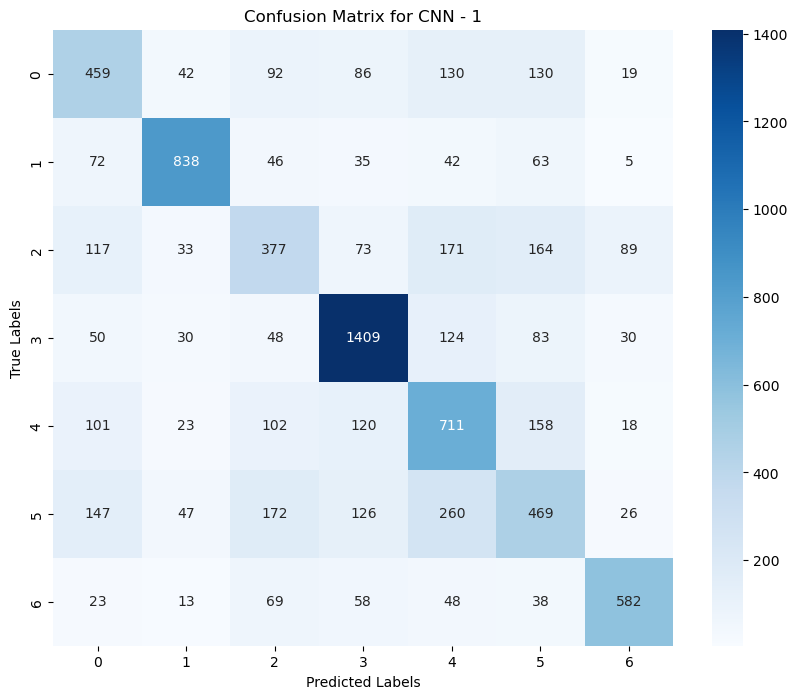

In [12]:

cnn_predicted_labels=lcnn.predict(test_images)

cnn_predicted_labels = np.argmax(cnn_predicted_labels, axis=1)

class_names = np.unique(test_labels)

cm = confusion_matrix(test_labels, cnn_predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CNN - 1')
plt.show()

In [13]:
p1=lcnn.predict(test_images)
t_p1=np.argmax(p1,axis=1)
classification_report_string = classification_report(test_labels, t_p1)
print(classification_report_string)

256/256 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.47      0.48      0.48       958
           1       0.82      0.76      0.79      1101
           2       0.42      0.37      0.39      1024
           3       0.74      0.79      0.77      1774
           4       0.48      0.58      0.52      1233
           5       0.42      0.38      0.40      1247
           6       0.76      0.70      0.73       831

    accuracy                           0.59      8168
   macro avg       0.59      0.58      0.58      8168
weighted avg       0.59      0.59      0.59      8168



# **VGG**

In [9]:
vgg1= load_model('/kaggle/input/saved-vgg/vgg1.h5')
vgg1.evaluate(test_images, test_labels)

256/256 [==============================] - 3s 9ms/step - loss: 2.1760 - accuracy: 0.6008


[2.1760222911834717, 0.6007590889930725]

256/256 [==============================] - 2s 7ms/step


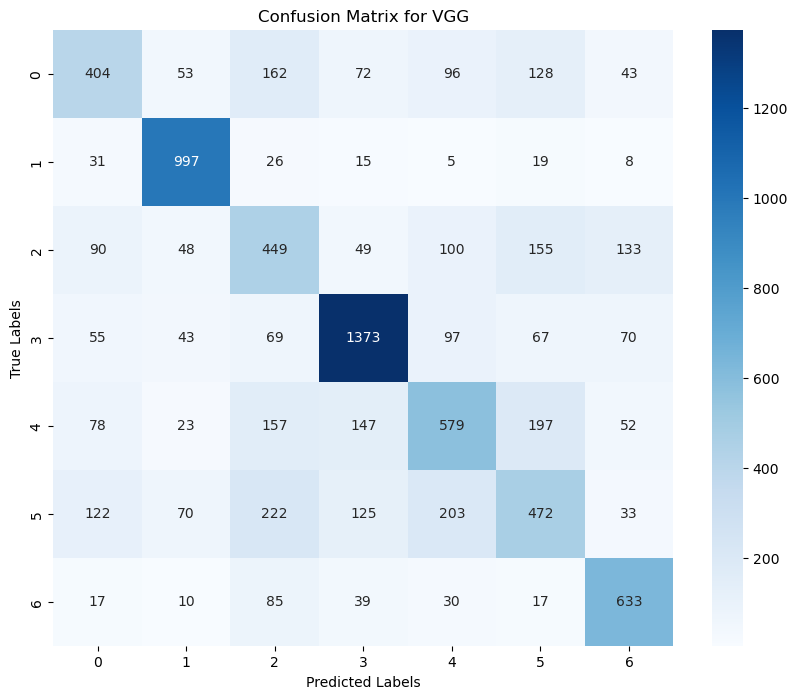

In [15]:

vgg_predicted_labels=vgg1.predict(test_images)

vgg_predicted_labels = np.argmax(vgg_predicted_labels, axis=1)


class_names = np.unique(test_labels)

cm = confusion_matrix(test_labels, vgg_predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for VGG')
plt.show()

In [16]:
p2=vgg1.predict(test_images)
t_p2=np.argmax(p2,axis=1)
classification_report_string = classification_report(test_labels, t_p2)
print(classification_report_string)

256/256 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.51      0.42      0.46       958
           1       0.80      0.91      0.85      1101
           2       0.38      0.44      0.41      1024
           3       0.75      0.77      0.76      1774
           4       0.52      0.47      0.49      1233
           5       0.45      0.38      0.41      1247
           6       0.65      0.76      0.70       831

    accuracy                           0.60      8168
   macro avg       0.58      0.59      0.58      8168
weighted avg       0.59      0.60      0.59      8168



# **ResNet**

In [10]:
resnet2= load_model('/kaggle/input/saved-resnet/res1_34.h5')
resnet2.evaluate(test_images, test_labels)

256/256 [==============================] - 3s 7ms/step - loss: 2.6668 - accuracy: 0.5664


[2.6668295860290527, 0.5663565397262573]

256/256 [==============================] - 2s 5ms/step


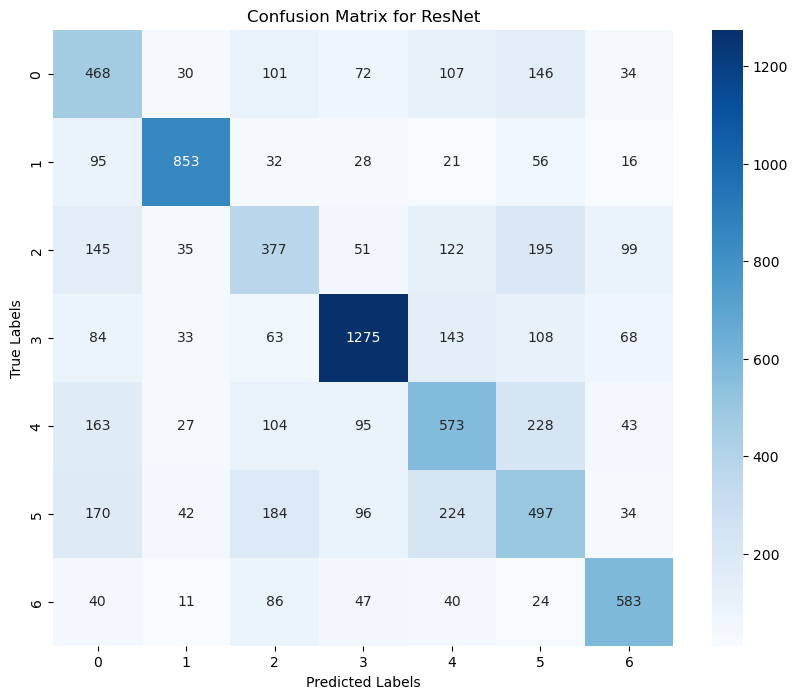

In [17]:

res_predicted_labels=resnet2.predict(test_images)

res_predicted_labels = np.argmax(res_predicted_labels, axis=1)

class_names = np.unique(test_labels)

cm = confusion_matrix(test_labels, res_predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for ResNet')
plt.show()

In [18]:
p3=resnet2.predict(test_images)
t_p3=np.argmax(p3,axis=1)
classification_report_string = classification_report(test_labels, t_p3)
print(classification_report_string)

256/256 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.40      0.49      0.44       958
           1       0.83      0.77      0.80      1101
           2       0.40      0.37      0.38      1024
           3       0.77      0.72      0.74      1774
           4       0.47      0.46      0.47      1233
           5       0.40      0.40      0.40      1247
           6       0.66      0.70      0.68       831

    accuracy                           0.57      8168
   macro avg       0.56      0.56      0.56      8168
weighted avg       0.57      0.57      0.57      8168



# **CNN - 2**

In [11]:
cnn1_2= load_model('/kaggle/input/saved-cnn2/cnn1_2.h5')
cnn1_2.evaluate(test_images, test_labels)

256/256 [==============================] - 1s 4ms/step - loss: 2.5355 - accuracy: 0.5766


[2.5354979038238525, 0.5766405463218689]

256/256 [==============================] - 1s 2ms/step


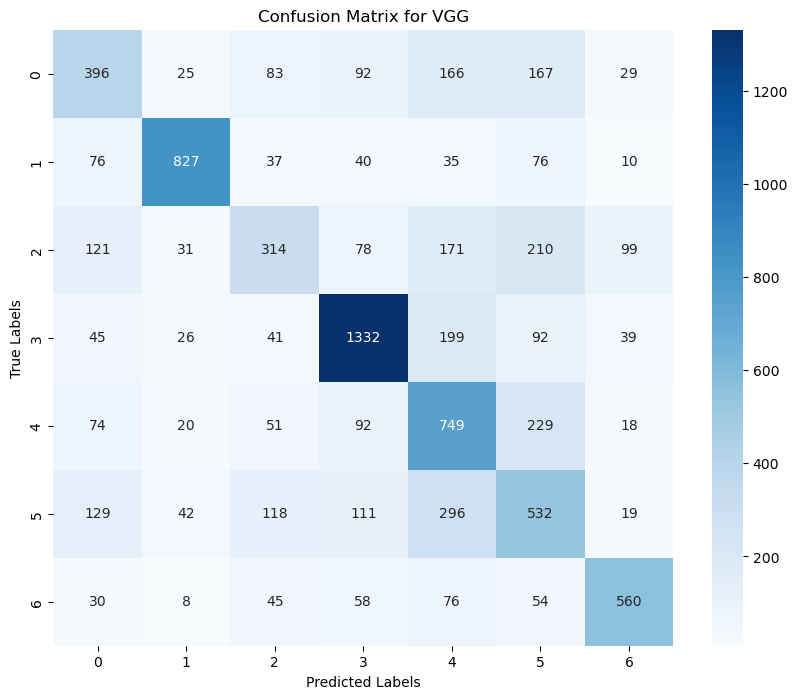

In [20]:

cnn2_predicted_labels=cnn1_2.predict(test_images)

cnn2_predicted_labels = np.argmax(cnn2_predicted_labels, axis=1)

class_names = np.unique(test_labels)

cm = confusion_matrix(test_labels,cnn2_predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for VGG')
plt.show()

In [21]:
p4=cnn1_2.predict(test_images)
t_p4=np.argmax(p4,axis=1)
classification_report_string = classification_report(test_labels, t_p4)
print(classification_report_string)

256/256 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.45      0.41      0.43       958
           1       0.84      0.75      0.80      1101
           2       0.46      0.31      0.37      1024
           3       0.74      0.75      0.74      1774
           4       0.44      0.61      0.51      1233
           5       0.39      0.43      0.41      1247
           6       0.72      0.67      0.70       831

    accuracy                           0.58      8168
   macro avg       0.58      0.56      0.57      8168
weighted avg       0.58      0.58      0.58      8168



In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
pred1 = lcnn.predict(val_images)
pred2 = vgg1.predict(val_images)
pred3 = resnet2.predict(val_images)
pred4 = cnn1_2.predict(val_images)

314/314 [==============================] - 1s 2ms/step


In [14]:
ensemble_pred1 = np.argmax(pred1, axis=1)
ensemble_pred2= np.argmax(pred2,axis=1)
ensemble_pred3= np.argmax(pred3 , axis=1)
ensemble_pred4= np.argmax(pred4 , axis=1)

In [15]:
a1=pd.DataFrame(ensemble_pred1)
a2=pd.DataFrame(ensemble_pred2)
a3=pd.DataFrame(ensemble_pred3)
a4=pd.DataFrame(ensemble_pred4)

In [16]:
a=pd.concat([a1,a2,a3,a4],axis=1)
a

,0,0,0,0
0,4,4,4,4
1,3,3,3,3
2,5,5,5,5
3,1,1,1,1
4,2,2,2,2
...,...,...,...,...
10034,4,4,4,4
10035,3,3,3,3
10036,0,0,0,0
10037,6,6,6,6


# **TEST DATA**

In [13]:
tpred1 = lcnn.predict(test_images)
tpred2 = vgg1.predict(test_images)
tpred3 = resnet2.predict(test_images)
tpred4 = cnn1_2.predict(test_images)

256/256 [==============================] - 1s 2ms/step


In [15]:
t_pred1 = np.argmax(tpred1, axis=1)
t_pred2= np.argmax(tpred2,axis=1)
t_pred3= np.argmax(tpred3 , axis=1)
t_pred4= np.argmax(tpred4 , axis=1)

In [16]:
ta1=pd.DataFrame(t_pred1)
ta2=pd.DataFrame(t_pred2)
ta3=pd.DataFrame(t_pred3)
ta4=pd.DataFrame(t_pred4)

In [17]:
test_final=pd.concat([ta1,ta2,ta3,ta4],axis=1)
test_final

,0,0,0,0
0,6,6,6,6
1,6,6,6,6
2,6,4,2,4
3,6,6,6,6
4,5,2,5,5
...,...,...,...,...
8163,3,1,4,3
8164,3,4,4,3
8165,0,4,4,2
8166,0,4,3,5


# **META MODEL**

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf1= RandomForestClassifier()

In [27]:
rf1.fit(a, val_labels)

RandomForestClassifier()

In [28]:
fin=rf1.predict(test_final)

In [38]:
from sklearn.ensemble import RandomForestClassifier
import joblib


file_path = '/kaggle/working/'+'rf'+'.pkl'


joblib.dump(rf1, file_path)

['/kaggle/working/rf.pkl']

# **Load Saved Meta - Model**

In [18]:
import joblib
file_path = '/kaggle/input/random-forest/rf.pkl'


meta_model = joblib.load(file_path)

In [19]:
fin=meta_model.predict(test_final)

In [20]:
fin

array([6, 6, 5, ..., 0, 0, 4], dtype=int32)

In [21]:
acc = accuracy_score(test_labels, fin)
acc

0.6246327130264446

In [27]:
classification_report_string = classification_report(test_labels, fin)
print(classification_report_string)

              precision    recall  f1-score   support

           0       0.49      0.51      0.50       958
           1       0.88      0.83      0.85      1101
           2       0.45      0.39      0.42      1024
           3       0.77      0.80      0.79      1774
           4       0.51      0.59      0.55      1233
           5       0.44      0.43      0.43      1247
           6       0.78      0.74      0.76       831

    accuracy                           0.62      8168
   macro avg       0.62      0.61      0.61      8168
weighted avg       0.62      0.62      0.62      8168



In [57]:

# ens = np.argmax(fin, axis=0)


# # Calculate the confusion matrix
# cm = confusion_matrix(test_labels,ens)

# # Plot the confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clas, yticklabels=clas)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix for ensemble')
# plt.show()

# **Real Time Data Evaluation**

In [22]:
import os
import cv2
import numpy as np

def convert_to_black_and_white(image):
    # Split  into RGB channels
    r, g, b = cv2.split(image)

    # Calculate weighted average of 3 channels
    gray = np.uint8((0.2989 * r) + (0.5870 * g) + (0.1140 * b))

    # grayscale  into 3-channel image
    gray_image = cv2.merge([gray] * 3)

    return gray_image

def read_resize(folder_path, target_size):
    image_array = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            image = cv2.imread(img_path)
            resized_image = cv2.resize(image, target_size)
            gray_image = convert_to_black_and_white(resized_image)
            blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 2)
            laplacian_kernel = np.array([[0, 0, 1, 0, 0],
                                         [0, 1, 2, 1, 0],
                                         [1, 2, -16, 2, 1],
                                         [0, 1, 2, 1, 0],
                                         [0, 0, 1, 0, 0]], dtype=np.float32)
            filtered_image = cv2.filter2D(blurred_image, -1, laplacian_kernel)
            processed_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
            image_array.append(processed_image)
    return np.array(image_array)


In [23]:
folder_path = "/kaggle/input/test-data6/test - Copy"
target_size = (48, 48)  
t_image = read_resize(folder_path, target_size)


In [24]:
pred1 = lcnn.predict(t_image)
pred2 = vgg1.predict(t_image)
pred3 = resnet2.predict(t_image)
pred4 = cnn1_2.predict(t_image)

1/1 [==============================] - 0s 89ms/step


In [25]:
tensemble_pred1 = np.argmax(np.sum([pred1], axis=0), axis=1)
tensemble_pred2 = np.argmax(np.sum([pred2], axis=0), axis=1)
tensemble_pred3 = np.argmax(np.sum([pred3], axis=0), axis=1)
tensemble_pred4 = np.argmax(np.sum([pred4], axis=0), axis=1)

In [26]:
c1=pd.DataFrame(tensemble_pred1)
c2=pd.DataFrame(tensemble_pred2)
c3=pd.DataFrame(tensemble_pred3)
c4=pd.DataFrame(tensemble_pred4)

In [27]:
c=pd.concat([c1,c2,c3,c4],axis=1)
c

,0,0,0,0
0,4,5,0,4
1,5,5,3,3
2,0,0,3,3
3,6,6,0,0
4,4,3,4,4
5,2,4,2,4
6,3,3,3,3
7,2,2,5,0
8,4,3,5,3
9,4,4,4,4


In [28]:
tstack_ensemble_predictions = meta_model.predict(c)

In [29]:
tstack_ensemble_predictions 

array([4, 5, 0, 6, 4, 2, 3, 2, 4, 4, 3, 3, 6, 4, 4, 4, 3, 1, 0, 2],
      dtype=int32)

In [30]:
def display_random_test(class_names, images, labels):

    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index].astype('uint8'), cmap=plt.cm.binary) 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

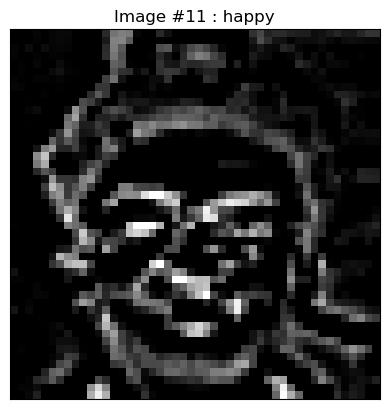

In [107]:
display_random_test(class_names, t_image,tstack_ensemble_predictions)

In [32]:

def read1_resize(folder_path, target_size):
    image_ar = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            image = cv2.imread(img_path)
            image_ar.append(image)
    return np.array(image_ar)

folder_path = "/kaggle/input/test-data6/test - Copy"
target_size = (48, 48)  
arr_image = read1_resize(folder_path, target_size)


/tmp/ipykernel_28/1819238541.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(image_ar)


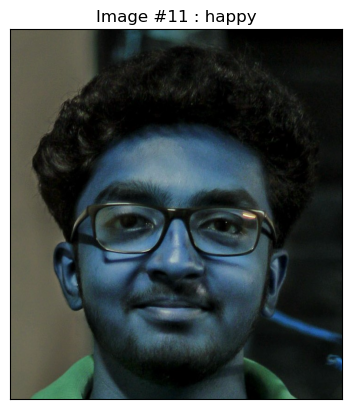

In [101]:
display_random_test(class_names, arr_image,tstack_ensemble_predictions)